In [6]:
import matplotlib.pyplot as plt
import pandas
import scipy.stats
import numpy as np

In [29]:
# lecture du csv et affichage
prenoms = pandas.read_csv("Prénoms/nat2019.csv", header = 0, sep = ";")
prenoms

,sexe,preusuel,annais,nombre
0,1,_PRENOMS_RARES,1900,1250
1,1,_PRENOMS_RARES,1901,1340
2,1,_PRENOMS_RARES,1902,1329
3,1,_PRENOMS_RARES,1903,1285
4,1,_PRENOMS_RARES,1904,1427
...,...,...,...,...
652051,2,ZYNEB,2016,6
652052,2,ZYNEB,2017,6
652053,2,ZYNEB,2018,5
652054,2,ZYNEB,2019,7


In [ ]:
# Note : 1 = homme, 2 = femme. test

In [11]:
def search(name, year):
    result = [0,0]
    for i in range(652056):
        if prenoms['preusuel'][i] == name:
            if prenoms['annais'][i] == year:
                result[prenoms['sexe'][i] - 1] = prenoms['nombre'][i]
    return result

research = 'KEVIN', '1986'

result = search(research[0], research[1])

print("Il y a eu " + str(result[0]) + " garçon(s) nommé(s) " + research[0] + " en " + research[1] + ".")
print("Il y a eu " + str(result[1]) + " fille(s) nommée(s) " + research[0] + " en " + research[1] + ".")


Il y a eu 4875 garçon(s) nommé(s) KEVIN en 1986.
Il y a eu 3 fille(s) nommée(s) KEVIN en 1986.


Le prénom MATTHIEU a été donné 30 fois à des hommes pour des années indéfinies


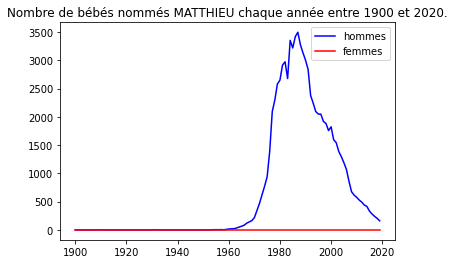

In [79]:
def plotNumberByYear(dataBase, name):
    isName = dataBase['preusuel']==name
    allName = dataBase[isName]

    allName = allName.replace('XXXX', '2050')



    allName['annais'] = allName['annais'].astype(int)

    X_M = [x for x in allName[allName.sexe==1].annais.array]
    Y_M = [y for y in allName[allName.sexe==1].nombre.array]
    X_F = [x for x in allName[allName.sexe==2].annais.array]
    Y_F = [y for y in allName[allName.sexe==2].nombre.array]

    for i in range(1900,2020):
        if not i in X_M:
            Y_M.insert(i-1900, 0)
        if not i in X_F:
            Y_F.insert(i-1900, 0)
    X = [i for i in range(1900, 2020)]
    if not 2050 in X_M :
        Y_M.append(0)
    if not 2050 in X_F :
        Y_F.append(0)


    males, = plt.plot(X, Y_M[:-1], c = 'blue')
    females, = plt.plot(X, Y_F[:-1], c = 'red')
    plt.legend([males, females], ['hommes', 'femmes'])
    plt.title("Nombre de bébés nommés " + name + " chaque année entre 1900 et 2020.")
    if Y_M[-1] != 0 :
        print("Le prénom " + name + " a été donné " + str(Y_M[-1]) + " fois à des hommes pour des années indéfinies")
    if Y_F[-1] != 0 :
        print("Le prénom " + name + " a été donné " + str(Y_F[-1]) + " fois à des femmes pour des années indéfinies")
    
    plt.show()

plotNumberByYear(prenoms, "MATTHIEU")

In [37]:
help(list.insert)

Help on method_descriptor:

insert(self, index, object, /)
    Insert object before index.

